In [4]:
!ls /workdir

Data-Guillermo				 MTDA-ITA
Data-Guillermo-20240916T235926Z-003.zip  Notebooks
Data-Guillermo-20240916T235926Z-004.zip


In [9]:
!export DEBIAN_FRONTEND=noninteractive
!apt-get update -y
!apt-get install git-all -y
#!pip install seqeval==0.0.5
#!pip install keras==2.0.8
#!pip install scipy
#!pip install scikit-learn
#!pip install tensorflow==1.15

#!pip install git+https://www.github.com/keras-team/keras-contrib.git

Get:1 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  InRelease
Ign:1 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  InRelease
Get:2 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  Release [574 B]
Get:2 file:/var/nvinfer-runtime-trt-repo-5.0.2-ga-cuda10.0  Release [574 B]    
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1581 B]
Err:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY A4B469963BF863CC
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease         
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease       
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86

In [26]:
#!pip install --upgrade pip setuptools
#!pip install keras==2.0.9
!pip install einops

In [10]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-fe1knxg0
  Running command git clone --filter=blob:none -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-fe1knxg0
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101267 sha256=731f665a220b9c3e689796ea23df5044d0feee016383976e8de0fe3544c48df2
  Stored in directory: /tmp/pip-ephem-wheel-cache-1d01m8qo/wheels/16/87/6e/8e3b73f23fb38163af1c319aa23f14602018b501ecb91430a2
Successfully built keras-contrib


In [1]:
import tensorflow as tf
tf.__version__
import keras
keras.__version__

Using TensorFlow backend.


'2.0.9'

In [1]:
import os
#tf.compat.v1.disable_v2_behavior()
import tensorflow as tf
import keras
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
#import tensorflow_hub as hub
#domain [MT2PA,PA2MT]
#version [run_0,run_1,run_2,run_3,run_4]
#component [classifer  dec_sh  dis  enc_ex  enc_sh]
root="/workdir/Data-Guillermo"
models_root=root+"/DADL-MT2PA/models/run_0"
def load_model(domain="MT2PA",version="run_0",component="classifer"):
  os.path.join(root,"DADL-"+domain,"models",version,component+".h5")
  return keras.models.load_model(os.path.join(root,"DADL-"+domain,"models",version,component+".h5"),compile=False,
                                                     custom_objects={'InstanceNormalization':tf.keras.layers.GroupNormalization}
)

def load_model(domain="MT2PA",version="run_0",component="classifer"):
  os.path.join(root,"DADL-"+domain,"models",version,component+".h5")
  return keras.models.load_model(os.path.join(root,"DADL-"+domain,"models",version,component+".h5"),#compile=False,
                                    #custom_objects={'InstanceNormalization':(lambda **args: tf.keras.layers.GroupNormalization(groups=1,axis=-1,center=True, scale=True))}
                                    custom_objects={'InstanceNormalization':InstanceNormalization,
                                                    
                                                   }
                                    
                                    #custom_objects={'InstanceNormalization':tf.keras.layers.GroupNormalization(axis=2,groups=-1)}
                                    #custom_objects={'InstanceNormalization':tf.keras.layers.GroupNormalization}
)

def load_model_(domain="MT2PA",version="run_0",component="classifer"):
  return os.path.join(root,"DADL-"+domain,"models",version,component+".h5")

Using TensorFlow backend.


In [2]:
model=load_model(domain="MT2PA",version="run_0",component="enc_sh")
model.summary()
model_dec=load_model(domain="MT2PA",version="run_0",component="dec_sh")









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enc_sh_input_enc_net (InputLaye (None, 128, 128, 20) 0                                            
__________________________________________________________________________________________________
enc_sh_conv_net_0 (Conv2D)      (None, 128, 128, 16) 15696       enc_sh_input_enc_net[0][0]       
__________________________________________________________________________________________________
enc_sh_isnt_norm_net_0 (Instanc (None, 128, 128, 16) 2           enc_sh_conv_net_0[0][0]          
__________________________________________________________________________________________________
enc_sh_relu_net_0 (Activation)  (None, 128, 128, 16) 0           enc_sh_isnt_norm_net_0[0][0]     
__________________________________________________________________________________________________
en

/usr/local/lib/python3.6/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


TypeError: ('Keyword argument not understood:', 'interpolation')

# DADOS

In [12]:
!ls /workdir/Data-Guillermo/dataset/MA

MA_1C_RGB_img_filt_norm_2020_2021_10B-001.npy  test_mask_MA.npy
MA_1C_ref_2020_2021.npy


In [3]:
#root="/workdir/Data-Guillermo"
root="/workdir/Data-Guillermo/dataset"
import numpy as np
import os
def load_dataset(dataset="MA",data="MA_1C_RGB_img_filt_norm_2020_2021_10B-001.npy",mask="test_mask_MA.npy"):
  return (np.load(os.path.join(root,dataset,data)),np.load(os.path.join(root,dataset,data)))

In [ ]:
dtp=load_dataset()

In [4]:
import numpy as np
from einops import rearrange
import matplotlib.pyplot as plt

In [75]:
x_d1=np.random.uniform(0,1,(1,128,128,20))
x_d2=np.random.uniform(0,1,(1,128,128,20))
z1_sh=model.predict(x_d1)
z2_sh=model.predict(x_d2)

In [76]:
x=tf.constant(x_d1)
x

<tf.Tensor 'Const_19:0' shape=(1, 128, 128, 20) dtype=float64>

In [42]:
from keras import backend as k

In [121]:
grads=k.gradients(k.log(1e-5+model(k.constant(x_d1))),model.trainable_weights)
grads=np.array(list(map(lambda g:k.get_value(g),grads)))

In [122]:
grads

array([array([[[[ 3.34192505e+03,  9.31937714e+01, -1.77647090e+04, ...,
          -6.51387024e+02,  2.20113359e+04, -1.23709375e+03],
         [ 7.88477844e+02, -1.13006458e+03, -1.52863213e+04, ...,
          -8.10193359e+02,  2.08248789e+04, -1.23607092e+03],
         [ 1.45352417e+03, -1.06572058e+03, -1.69150508e+04, ...,
          -1.07147363e+03,  2.19653301e+04, -1.23719043e+03],
         ...,
         [ 3.41642188e+03,  2.44350479e+02, -1.58904355e+04, ...,
          -5.60904297e+02,  1.53331465e+04, -1.23666296e+03],
         [ 1.27342871e+03, -5.40108490e+00, -1.55857021e+04, ...,
          -1.12631274e+03,  2.10472793e+04, -1.25056140e+03],
         [ 1.34827893e+03, -1.77123795e+01, -1.50518096e+04, ...,
          -5.64238525e+02,  2.51009355e+04, -1.23942993e+03]],

        [[ 1.21950916e+03, -1.80697095e+03, -1.55723779e+04, ...,
          -8.86090332e+02,  1.86039941e+04, -1.24954578e+03],
         [ 3.59044006e+02,  9.90026611e+02, -1.53788086e+04, ...,
          -9.92

In [106]:
model.trainable_weights[0]
k.get_value(model.trainable_weights[0])

array([[[[-2.99956482e-02, -1.43154031e-02,  1.49743771e-03, ...,
          -1.80786364e-02, -4.08130214e-02, -3.06787174e-02],
         [-3.77274901e-02, -2.45783869e-02, -1.82511471e-03, ...,
          -2.95901801e-02, -2.37070285e-02, -2.70492025e-02],
         [ 7.75901368e-03,  1.94825213e-02, -4.02873717e-02, ...,
          -3.46575752e-02, -3.31443213e-02,  7.09106121e-03],
         ...,
         [-2.35808529e-02, -1.85187012e-02, -3.28244455e-02, ...,
          -1.47177523e-03,  1.15112150e-02, -5.52098849e-04],
         [ 1.95073225e-02, -2.86295135e-02, -2.48007998e-02, ...,
           5.32181486e-02,  3.57156396e-02, -1.09396465e-02],
         [-5.53109497e-03, -3.41883227e-02, -2.72989608e-02, ...,
          -3.13900714e-03, -2.84170453e-02, -3.11130658e-02]],

        [[ 8.14350694e-03,  6.60771318e-03,  2.52217185e-02, ...,
          -6.94886735e-03, -2.27627791e-02,  1.72532201e-02],
         [ 2.84759467e-03,  1.71596557e-02,  1.77981029e-03, ...,
           3.69136827e

In [17]:
z1_sh

AttributeError: 'Tensor' object has no attribute 'as_numpy'

In [ ]:
model.

In [7]:
dy_dx_1

NameError: name 'dy_dx_1' is not defined

In [ ]:
with tf.GradientTape() as tape:
    z2_sh=model(x_d2)

dy_dx_2 = tape.gradient(z2_sh , x_d2)
dy_dx_1.numpy()

In [118]:
import sys
sys.path.append("../Utils")
from Distances import *

### Maximun Mean Discrepancy

In [124]:
MMD_RF=MMD(kernel=radial_funtion)
MMD_GRF=MMD(kernel=guassian_norm_funtion)

print(MMD_RF.compute(z1_sh,z2_sh))
print(MMD_GRF.compute(z1_sh,z2_sh))

### KL-Divergence

In [ ]:
KL_divergence

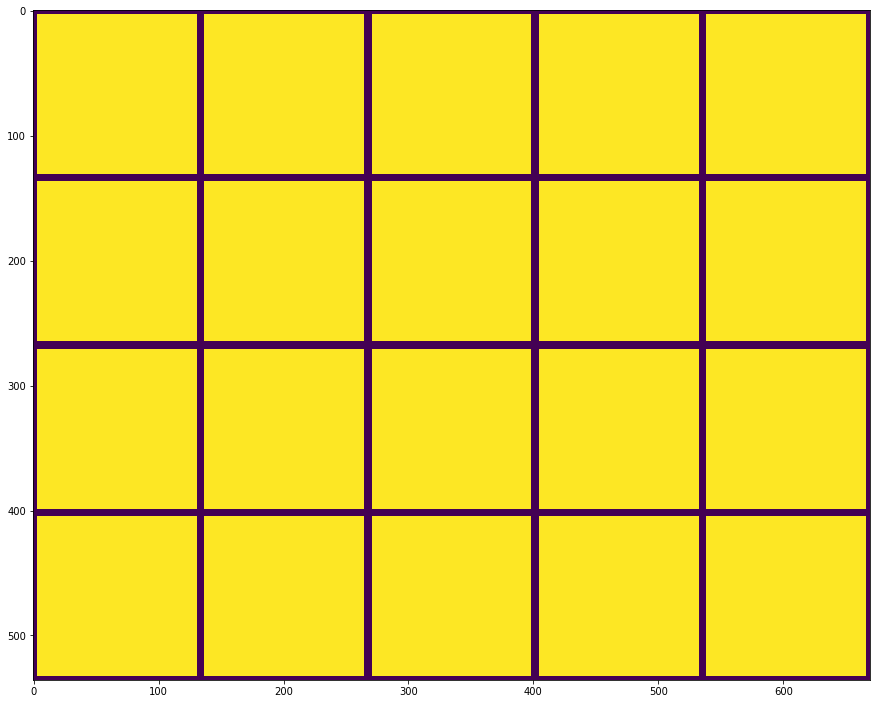

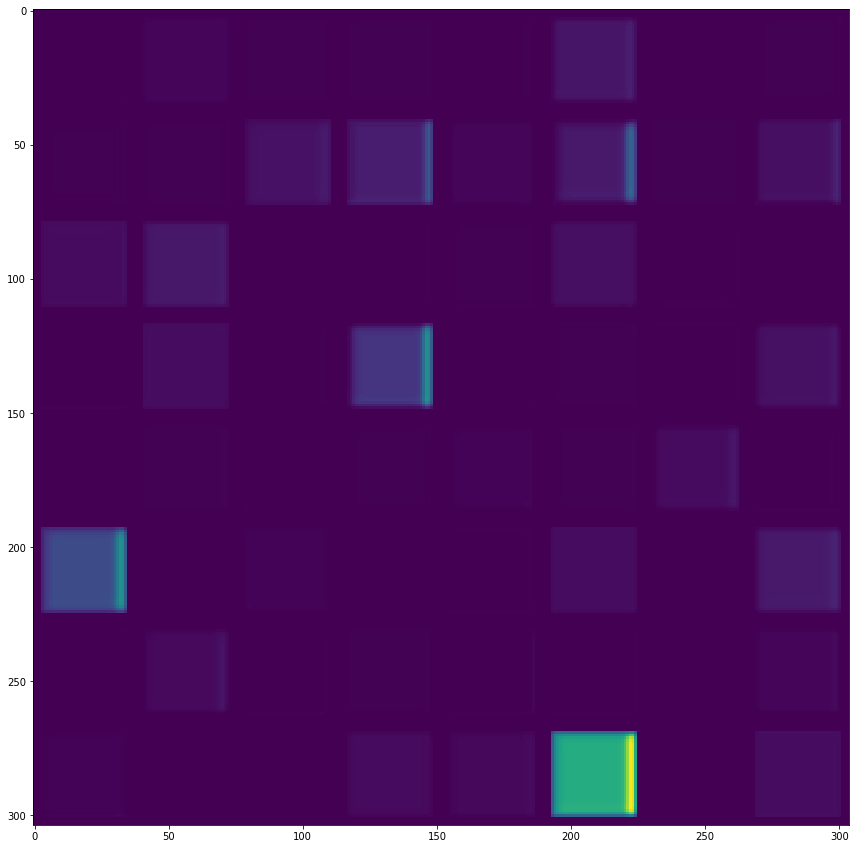

In [108]:
x=np.random.uniform(0,5,(1,128,128,20))
x=np.ones((1,128,128,20))
z_sh=model.predict(x)

plt.figure(figsize=(15,15))
plt.imshow(
    rearrange(
        np.pad(x[0], ((3,3),(3,3),(0,0)), 'constant', constant_values=(0,0)),
        #x[0] ,
        'b c (d1 d2) -> (d1 b) (d2 c)',d1=4,d2=5
    )
)

plt.figure(figsize=(15,15))
plt.imshow(
    rearrange(
        np.pad(z_sh[0], ((3,3),(3,3),(0,0)), 'constant', constant_values=(0,0)),
        #z_sh[0] ,
        'b c (d1 d2) -> (d1 b) (d2 c)',d1=8,d2=8))